
<div style="background-image: url('https://narisyu.cdnbro.com/posts/9976253-risunok-bank-50.jpg'); background-size: cover; background-position: center; padding: 20px; height: 500px; border-radius: 20px;">
    <h1 style="font-weight: bold; font-size: 26px; font-family: avenir;">Binary Classification with a Bank Churn</h1>







</div>


<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #ECE3CE); border: 2px solid #000; border-radius: 10px; font-family: avenir;">

### Overview
The analysis involves examining various factors to understand their influence on bank churn prediction. This process is crucial for financial institutions, policy makers, and individuals to make informed decisions about customer retention strategies.

### Dataset
The dataset used for this analysis comprises numerous features, including 'id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', and 'Exited'. These variables provide essential insights into individual characteristics and banking habits, which are instrumental in understanding bank churn prediction.

### Objectives
1. Develop a comprehensive understanding of the relationships between different factors and bank churn prediction.
2. Investigate the impact of different factors such as customer ID, surname, credit score, geography, gender, age, tenure, balance, number of products, credit card ownership, active membership, and estimated salary on bank churn prediction.
3. Provide valuable insights to financial institutions, policy makers, and individuals to facilitate better decision-making regarding customer retention strategies.

### Methodology
1. **Data Collection and Preprocessing**: Gather comprehensive datasets and preprocess them by handling missing values, encoding categorical variables, and normalizing numerical features.
2. **Feature Engineering**: Extract relevant features and potentially create new ones to enhance the understanding of bank churn prediction.
3. **Data Analysis**: Explore various statistical methods to identify the relationships and dependencies between different factors and bank churn prediction.
4. **Data Interpretation**: Interpret the results of the data analysis to gain insights into the underlying factors influencing bank churn prediction.


<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #a1d6e2); border: 2px solid #000; border-radius: 10px; text-align: center; font-family: avenir;">



    
## Libraries

In [49]:
# Ignore Warnings
import warnings

# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Optimization
from sklearn.experimental import enable_halving_search_cv  # Enables HalvingGridSearchCV and HalvingRandomSearchCV
from sklearn.model_selection import HalvingRandomSearchCV

# Data Transformation
from sklearn.preprocessing import  RobustScaler, PolynomialFeatures, StandardScaler, MinMaxScaler
from optbinning import OptimalBinning

# Feature Selection
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# Pipeline
from sklearn.pipeline import Pipeline, FeatureUnion  # Импорт классов Pipeline и make_pipeline из scikit-learn
from sklearn.base import BaseEstimator, TransformerMixin  # Импорт базовых классов BaseEstimator и TransformerMixin

# Metrics
from sklearn.metrics import (f1_score, roc_auc_score, roc_curve, precision_score, 
                            classification_report, precision_recall_curve, confusion_matrix, 
                            accuracy_score, recall_score, silhouette_score, auc)


# Classification Algorithm
from lightgbm import LGBMClassifier

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


%config InlineBackend.figure_format = 'svg'
warnings.filterwarnings('ignore')  # Disabling warning outputs

<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #ECE3CE); border: 2px solid #000; border-radius: 10px; font-family: avenir;">
    
    
### Project Structure

1. [**Loading Data**](#first): Load the dataset from a file or source into a DataFrame for analysis.
2. [**Data Preprocessing**](#second): Handle any missing or erroneous data, perform data type conversions, and clean the dataset for further analysis.
3. [**Exploratory Data Analysis (EDA)**](#third): Explore the dataset to gain insights into its distribution, relationships, and patterns. Visualize key features and relationships between variables.
4. [**Feature Engineering**](#fifth): Create new features or transform existing ones to improve the predictive power of the model.
5. [**Model Training and Validating with StratifiedKFold**](#seventh): Utilize machine learning algorithms to train a predictive model on the training data.
6. [**Model Evaluation**](#eighth): Evaluate the trained model's performance using appropriate metrics and techniques.
7. [**Test Submission**](#ten): Develop a user-friendly interface using Dash to visualize model predictions.



<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #a1d6e2); border: 2px solid #000; border-radius: 10px; text-align: center; font-family: avenir;">
    
# <a id='first'></a> Loading Data

In [2]:
# Path to the CSV data file
TRAIN_DATAPATH = './data/train.csv'
TEST_DATAPATH = './data/test.csv'

# # Reading data from the CSV file into a DataFrame
train = pd.read_csv(TRAIN_DATAPATH) 
test = pd.read_csv(TEST_DATAPATH) 

# Concatenating train and test dataframes along axis 0 (rows) to combine them into a single dataframe.
df = pd.concat([train, test], axis=0)


# Displaying the first few rows of the DataFrame
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0.0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0.0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0.0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0.0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0.0


In [3]:
df.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [4]:
# Dropping the 'id' column from the dataframe.
df.drop(columns=['id'], inplace=True)

In [5]:
# Initialize empty lists to store object and non-object columns
obj = []
ints = []

# Loop through DataFrame columns
for col in df.columns:
    # Check if column data type is object
    if df[col].dtype == 'object':
        # If object, append column name, unique values count, and count of missing values to 'obj' list
        obj.append((col, df[col].nunique(), df[col].isna().sum()))
    else:
        # If non-object, append column name, unique values count, and count of missing values to 'ints' list
        ints.append((col, df[col].nunique(), df[col].isna().sum(), df[col].skew()))

# Determine the maximum length of 'obj' and 'ints' lists
max_len = max(len(obj), len(ints))

# Extend 'obj' and 'ints' lists with empty tuples to match the maximum length
obj.extend([('', '', '')] * (max_len - len(obj)))
ints.extend([('', '', '', '')] * (max_len - len(ints)))

# Create a dictionary with keys representing column categories and values representing lists of corresponding data
data = {
    'Categorical_columns': [x[0] for x in obj],
    'cat_cols_uniques': [x[1] for x in obj],
    'cat_cols_missing': [x[2] for x in obj],
    'Numeric_columns': [x[0] for x in ints],
    'int_cols_uniques': [x[1] for x in ints],
    'int_cols_missing': [x[2] for x in ints],
    'int_cols_skew': [x[3] for x in ints]
}

# Convert the dictionary into a pandas DataFrame
pd.DataFrame(data)




,Categorical_columns,cat_cols_uniques,cat_cols_missing,Numeric_columns,int_cols_uniques,int_cols_missing,int_cols_skew
0,Surname,2889,0,CustomerId,28474,0,-0.023420
1,Geography,3,0,CreditScore,458,0,-0.060537
2,Gender,2,0,Age,74,0,0.969792
3,,,,Tenure,11,0,0.012432
4,,,,Balance,43875,0,0.383297
5,,,,NumOfProducts,4,0,0.361181
6,,,,HasCrCard,2,0,-1.176972
7,,,,IsActiveMember,2,0,0.012979
8,,,,EstimatedSalary,79868,0,-0.307523
9,,,,Exited,2,110023,1.412215


<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #ECE3CE); border: 2px solid #000; border-radius: 10px; font-family: avenir;">
    
**Categorical Columns:**
- The dataset includes several categorical variables such as 'Surname', 'Geography', 'Gender', 'HasCrCard', and 'IsActiveMember'.
- These categorical variables have different numbers of unique values, ranging from 2 ('Gender', 'HasCrCard', 'IsActiveMember') to 2889 ('Surname'). 
- There are no missing values in these categorical columns.

**Numeric Columns:**
- The dataset also includes several numeric variables such as 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', and 'Exited'.
- These numeric variables have different numbers of unique values, ranging from 2 ('Exited') to 79868 ('EstimatedSalary').
- There are no missing values in these numeric columns, except for 'Exited', which has 110023 missing values.
- The skewness of these numeric columns varies, indicating different levels of asymmetry around the mean. For instance, 'Age' has a positive skew (0.969792), indicating that the distribution has a long right tail. On the other hand, 'CustomerId' has a negative skew (-0.023420), indicating that the distribution has a long left tail. The 'Exited' column, which is our target variable for the binary classification, has a high positive skew (1.412215), indicating a class imbalance that we may need to address during model training.



In [6]:
# Printing out the column names of the dataframe.
print(df.columns)


Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')


<!-- <div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #ECE3CE);background-image: url('https://www.icegif.com/wp-content/uploads/fat-lady-singing-icegif-4.gif'); border: 2px solid #000; border-radius: 10px; font-family: avenir;"> -->

<div style="position: relative; padding: 10px; background-image: linear-gradient(to right, #ECE3CE, #fffff); border: 2px solid #000; border-radius: 10px; font-family: avenir;">



<!-- <div style="position: absolute; bottom: 10; right: 0; width: 300px; height: 300px; background-image: url('https://i.gifer.com/TOSe.gif'); background-size: cover;border-radius: 10px;"></div> -->

<div style="position: absolute; bottom: 50px; right: 10px; width: 300px; height: 180px; background-image: url('https://i.gifer.com/TOSe.gif'); background-size: 100% 100%; border-radius: 10px;"></div>



- **CustomerId**: The unique identifier of the customer.
- **Surname**: The surname of the customer.
- **CreditScore**: The credit score of the customer.
- **Geography**: The geographical location of the customer (e.g., France, Spain, Germany).
- **Gender**: The gender of the customer (e.g., Male, Female).
- **Age**: The age of the customer in years.
- **Tenure**: The number of years the customer has been with the bank.
- **Balance**: The bank balance of the customer.
- **NumOfProducts**: The number of products the customer has with the bank.
- **HasCrCard**: Indicates whether the customer has a credit card with the bank (e.g., Yes, No).
- **IsActiveMember**: Indicates whether the customer is an active member (e.g., Yes, No).
- **EstimatedSalary**: The estimated salary of the customer.
- **Exited**: Whether the customer has exited the bank (e.g., Yes, No). This is the target variable for the binary classification.

</div>


In [7]:
# This line of code retrieves the shape of the DataFrame 'df'
shape = df.shape
print(shape)

(275057, 13)


<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #a1d6e2); border: 2px solid #000; border-radius: 10px; text-align: center; font-family: avenir;">
    
# <a id='second'></a> Data Preprocessing

In [8]:
# Displaying concise summary information about the DataFrame, including
# data types, non-null values, and memory usage
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 275057 entries, 0 to 110022
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CustomerId       275057 non-null  int64  
 1   Surname          275057 non-null  object 
 2   CreditScore      275057 non-null  int64  
 3   Geography        275057 non-null  object 
 4   Gender           275057 non-null  object 
 5   Age              275057 non-null  float64
 6   Tenure           275057 non-null  int64  
 7   Balance          275057 non-null  float64
 8   NumOfProducts    275057 non-null  int64  
 9   HasCrCard        275057 non-null  float64
 10  IsActiveMember   275057 non-null  float64
 11  EstimatedSalary  275057 non-null  float64
 12  Exited           165034 non-null  float64
dtypes: float64(6), int64(4), object(3)
memory usage: 29.4+ MB


In [9]:
# Displaying the data types of each column in the DataFrame
df.dtypes

CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited             float64
dtype: object

In [10]:
# Calculate the sum of missing values for each column and reset the index, storing the result in a new DataFrame called 'isna'
isna = df.isna().sum().reset_index(name="missing_values")

# Calculate the percentage of missing values for each column and add it as a new column called 'percentage' in the 'isna' DataFrame
isna['percentage'] = round((isna['missing_values'] / df.shape[0]) * 100, 2)

# Sort the 'isna' DataFrame by the 'missing_values' column in descending order and display the top 35 rows
isna.sort_values(by='missing_values', ascending=False)


,index,missing_values,percentage
12,Exited,110023,40.0
0,CustomerId,0,0.0
1,Surname,0,0.0
2,CreditScore,0,0.0
3,Geography,0,0.0
4,Gender,0,0.0
5,Age,0,0.0
6,Tenure,0,0.0
7,Balance,0,0.0
8,NumOfProducts,0,0.0


In [11]:
# Counting the number of duplicated rows in the DataFrame 
df.duplicated().value_counts()


False    275057
Name: count, dtype: int64

In [12]:
df.isnull().sum()

CustomerId              0
Surname                 0
CreditScore             0
Geography               0
Gender                  0
Age                     0
Tenure                  0
Balance                 0
NumOfProducts           0
HasCrCard               0
IsActiveMember          0
EstimatedSalary         0
Exited             110023
dtype: int64

<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #cdbea7); border: 2px solid #000; border-radius: 40px; text-align: center; font-family: avenir;">
    
### Preprocessing the Column Names

In [13]:
# Remove 'CustomerId' and 'Surname' columns from DataFrame df
df.drop(columns=['CustomerId', 'Surname'], inplace=True)


In [14]:
# Initialize an empty list to store the transformed column names
new_columns = []

# Iterate through the current column names in the DataFrame
for j in df.columns.tolist():
    # Convert each column name to a list of characters
    col = list(j)
    
    # Find the indices of uppercase characters (excluding the first character) to insert underscores
    upper_case_indices = [index for index, char in enumerate(j) if char.isupper() and index != 0]
    
    # Iterate through the uppercase indices in reverse order and insert underscores
    for snake in reversed(upper_case_indices):
        col.insert(snake, '_')
    
    # Join the characters back together to form the transformed column name and append it to the new_columns list
    new_columns.append(''.join(col))

# Assign the transformed column names to the DataFrame's columns attribute
df.columns = new_columns

# Convert all column names to lowercase
df.columns = df.columns.str.lower()


# Displaying the first few rows of the dataframe.
df.head()


,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0.0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0.0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0.0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0.0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0.0


In [15]:
df.dtypes

credit_score          int64
geography            object
gender               object
age                 float64
tenure                int64
balance             float64
num_of_products       int64
has_cr_card         float64
is_active_member    float64
estimated_salary    float64
exited              float64
dtype: object

<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #a1d6e2); border: 2px solid #000; border-radius: 10px; text-align: center;font-family: avenir;">
    
# <a id='third'></a> Exploratory Data Analysis

In [16]:
# Generate descriptive statistics for all numerical columns
df.describe()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
count,275057.000000,275057.000000,275057.000000,275057.000000,275057.000000,275057.000000,275057.000000,275057.000000,165034.000000
mean,656.484939,38.124415,5.010867,55420.296450,1.554002,0.753589,0.496755,112470.952558,0.211599
std,80.188100,8.864927,2.806173,62805.933171,0.546178,0.430921,0.499990,50286.608747,0.408443
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74580.800000,0.000000
50%,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117848.090000,0.000000
75%,710.000000,42.000000,7.000000,120037.960000,2.000000,1.000000,1.000000,154871.130000,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [17]:
# Generate descriptive statistics for categorical columns
df.describe(include='object')

,geography,gender
count,275057,275057
unique,3,2
top,France,Male
freq,157386,155092


In [18]:
# Extract the target variable "exited" from the DataFrame 'df'
TARGET = df[:len(train)]['exited']

# Count the occurrences of each class within the target variable
target_counts = TARGET.value_counts()

exited
0.0    130113
1.0     34921
Name: count, dtype: int64

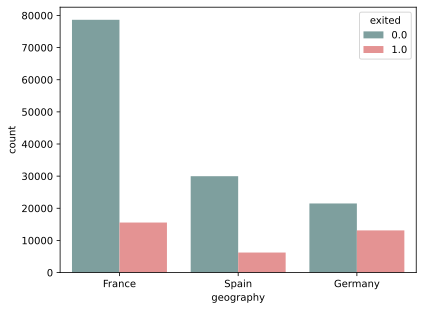

exited_count
geography exited             
France    0.0          47.65%
          1.0           9.44%
Germany   0.0          13.02%
          1.0           7.95%
Spain     0.0          18.16%
          1.0           3.78%

In [19]:
# Plot a count plot to visualize the distribution of 'exited' based on 'geography'
sns.countplot(data=df[:len(train)], x='geography', hue='exited', palette=['#78a5a3', '#f28585'])

# Rotate the x-axis labels to make them horizontal for better readability
plt.xticks(rotation=0)

# Display the plot
plt.show()

# Calculate the total count of entries in the DataFrame subset
total_count = len(df[:len(train)])

# Group the DataFrame subset by 'geography' and 'exited', calculate the percentage of 'exited', and format the result as a string with percentage sign
result = df[:len(train)].groupby(['geography', 'exited']).agg(
    exited_count= ('exited', lambda x: round((x.count() / total_count) * 100, 2))
).astype(str) + '%'

# Display the result
result


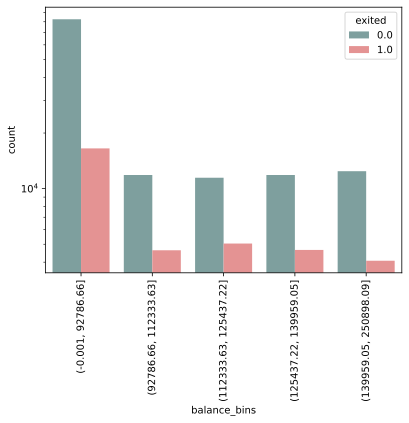

exited_count
balance_bins           exited             
(-0.001, 92786.66]     0.0          50.01%
                       1.0           10.0%
(92786.66, 112333.63]  0.0           7.18%
                       1.0           2.81%
(112333.63, 125437.22] 0.0           6.94%
                       1.0           3.06%
(125437.22, 139959.05] 0.0           7.18%
                       1.0           2.82%
(139959.05, 250898.09] 0.0           7.53%
                       1.0           2.47%

In [20]:
# Create a copy of a subset of the original DataFrame
qcut = df[:len(train)].copy()

# Bin the 'balance' column into quantiles and add a new column 'balance_bins' to store the bin labels
qcut['balance_bins'] = pd.qcut(qcut['balance'], q=10, duplicates='drop')

# Plot a count plot to visualize the distribution of 'exited' based on 'balance_bins'
sns.countplot(data=qcut, x='balance_bins', hue='exited', palette=['#78a5a3', '#f28585'])

# Set logarithmic scale on the y-axis for better visualization
plt.yscale('log')

# Rotate the x-axis labels to make them vertical for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

# Group the DataFrame by 'balance_bins' and 'exited', calculate the percentage of 'exited', and format the result as a string with percentage sign
result = qcut.groupby(['balance_bins', 'exited']).agg(
    exited_count= ('exited', lambda x: round((x.count() / total_count) * 100, 2))
).astype(str) + '%'

# Display the result
result

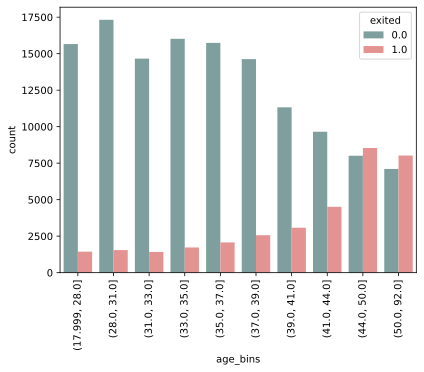

exited_count
age_bins       exited             
(17.999, 28.0] 0.0           9.49%
               1.0           0.87%
(28.0, 31.0]   0.0          10.49%
               1.0           0.94%
(31.0, 33.0]   0.0           8.88%
               1.0           0.86%
(33.0, 35.0]   0.0            9.7%
               1.0           1.05%
(35.0, 37.0]   0.0           9.54%
               1.0           1.25%
(37.0, 39.0]   0.0           8.86%
               1.0           1.55%
(39.0, 41.0]   0.0           6.86%
               1.0           1.87%
(41.0, 44.0]   0.0           5.85%
               1.0           2.73%
(44.0, 50.0]   0.0           4.85%
               1.0           5.18%
(50.0, 92.0]   0.0            4.3%
               1.0           4.86%

In [21]:
# Create a copy of a subset of the original DataFrame
qcut = df[:len(train)].copy()

# Bin the 'age' column into quantiles and add a new column 'age_bins' to store the bin labels
qcut['age_bins'] = pd.qcut(qcut['age'], q=10)

# Plot a count plot to visualize the distribution of 'exited' based on 'age_bins'
sns.countplot(data=qcut, x='age_bins', hue='exited', palette=['#78a5a3', '#f28585'])

# Rotate the x-axis labels to make them vertical for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

# Group the DataFrame by 'age_bins' and 'exited', calculate the percentage of 'exited', and format the result as a string with percentage sign
result = qcut.groupby(['age_bins', 'exited']).agg(
    exited_count=('exited', lambda x: round((x.count() / total_count) * 100, 2))
).astype(str) + '%'

# Display the result
result

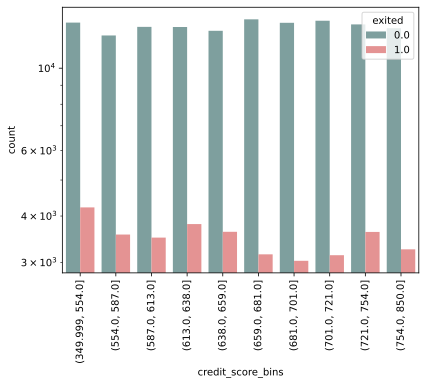

exited_count
credit_score_bins exited             
(349.999, 554.0]  0.0           8.04%
                  1.0           2.56%
(554.0, 587.0]    0.0           7.42%
                  1.0           2.16%
(587.0, 613.0]    0.0           7.83%
                  1.0           2.12%
(613.0, 638.0]    0.0           7.82%
                  1.0           2.31%
(638.0, 659.0]    0.0           7.64%
                  1.0            2.2%
(659.0, 681.0]    0.0            8.2%
                  1.0           1.91%
(681.0, 701.0]    0.0           8.03%
                  1.0           1.84%
(701.0, 721.0]    0.0           8.13%
                  1.0            1.9%
(721.0, 754.0]    0.0           7.95%
                  1.0            2.2%
(754.0, 850.0]    0.0           7.77%
                  1.0           1.97%

In [22]:
# Create a copy of a subset of the original DataFrame
qcut = df[:len(train)].copy()

# Bin the 'credit_score' column into quantiles and add a new column 'credit_score_bins' to store the bin labels
qcut['credit_score_bins'] = pd.qcut(qcut['credit_score'], q=10)

# Plot a count plot to visualize the distribution of 'exited' based on 'credit_score_bins'
sns.countplot(data=qcut, x='credit_score_bins', hue='exited', palette=['#78a5a3', '#f28585'])

# Set logarithmic scale on the y-axis for better visualization
plt.yscale('log')

# Rotate the x-axis labels to make them vertical for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

# Group the DataFrame by 'credit_score_bins' and 'exited', calculate the percentage of 'exited', and format the result as a string with percentage sign
result = qcut.groupby(['credit_score_bins', 'exited']).agg(
    exited_count=('exited', lambda x: round((x.count() / total_count) * 100, 2))
).astype(str) + '%'

# Display the result
result

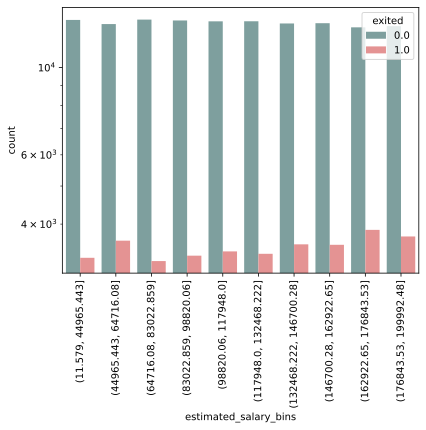

exited_count
estimated_salary_bins   exited             
(11.579, 44965.443]     0.0           8.01%
                        1.0           1.99%
(44965.443, 64716.08]   0.0           7.82%
                        1.0            2.2%
(64716.08, 83022.859]   0.0           8.03%
                        1.0           1.95%
(83022.859, 98820.06]   0.0           7.99%
                        1.0           2.01%
(98820.06, 117948.0]    0.0           7.95%
                        1.0           2.07%
(117948.0, 132468.222]  0.0           7.95%
                        1.0           2.04%
(132468.222, 146700.28] 0.0           7.85%
                        1.0           2.15%
(146700.28, 162922.65]  0.0           7.86%
                        1.0           2.15%
(162922.65, 176843.53]  0.0           7.67%
                        1.0           2.34%
(176843.53, 199992.48]  0.0           7.72%
                        1.0           2.25%

In [23]:
# Create a copy of a subset of the original DataFrame
qcut = df[:len(train)].copy()

# Bin the 'estimated_salary' column into quantiles and add a new column 'estimated_salary_bins' to store the bin labels
qcut['estimated_salary_bins'] = pd.qcut(qcut['estimated_salary'], q=10)

# Plot a count plot to visualize the distribution of 'exited' based on 'estimated_salary_bins'
sns.countplot(data=qcut, x='estimated_salary_bins', hue='exited', palette=['#78a5a3', '#f28585'])

# Set logarithmic scale on the y-axis for better visualization
plt.yscale('log')

# Rotate the x-axis labels to make them vertical for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

# Group the DataFrame by 'estimated_salary_bins' and 'exited', calculate the percentage of 'exited', and format the result as a string with percentage sign
result = qcut.groupby(['estimated_salary_bins', 'exited']).agg(
    exited_count=('exited', lambda x: round((x.count() / total_count) * 100, 2))
).astype(str) + '%'

# Display the result
result

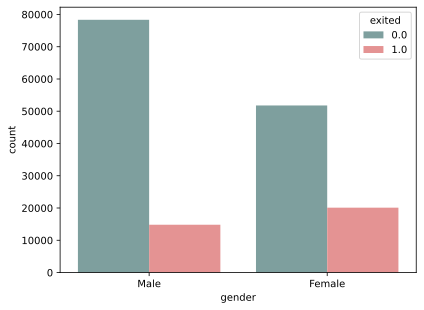

exited_count
gender exited             
Female 0.0          31.37%
       1.0          12.18%
Male   0.0          47.47%
       1.0           8.98%

In [24]:
# Plot a count plot to visualize the distribution of 'exited' based on 'gender'
sns.countplot(data=df[:len(train)], x='gender', hue='exited', palette=['#78a5a3', '#f28585'])

# Display the plot
plt.show()

# Group the DataFrame by 'gender' and 'exited', calculate the percentage of 'exited', and format the result as a string with percentage sign
result = df[:len(train)].groupby(['gender', 'exited']).agg(
    exited_count=('exited', lambda x: round((x.count() / total_count) * 100, 2))
).astype(str) + '%'

# Display the result
result

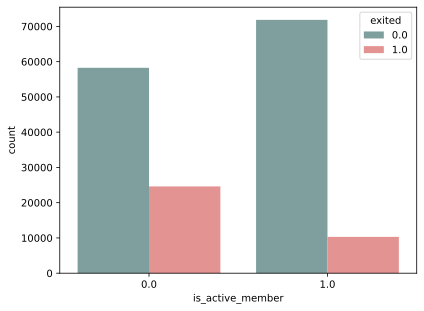

exited_count
is_active_member exited             
0.0              0.0           35.3%
                 1.0          14.92%
1.0              0.0          43.54%
                 1.0           6.24%

In [25]:
# Plot a count plot to visualize the distribution of 'exited' based on 'is_active_member'
sns.countplot(data=df[:len(train)], x='is_active_member', hue='exited', palette=['#78a5a3', '#f28585'])

# Display the plot
plt.show()

# Group the DataFrame by 'is_active_member' and 'exited', calculate the percentage of 'exited', and format the result as a string with percentage sign
result = df[:len(train)].groupby(['is_active_member', 'exited']).agg(
    exited_count=('exited', lambda x: round((x.count() / total_count) * 100, 2))
).astype(str) + '%'

# Display the result
result

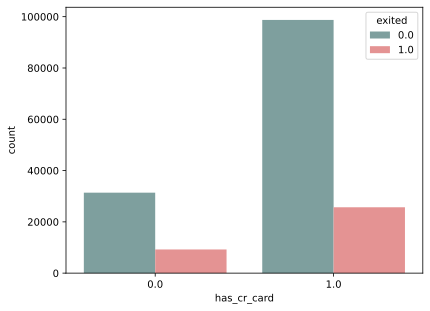

exited_count
has_cr_card exited             
0.0         0.0          19.01%
            1.0            5.6%
1.0         0.0          59.83%
            1.0          15.56%

In [26]:
# Plot a count plot to visualize the distribution of 'exited' based on 'has_cr_card'
sns.countplot(data=df[:len(train)], x='has_cr_card', hue='exited', palette=['#78a5a3', '#f28585'])

# Display the plot
plt.show()

# Group the DataFrame by 'has_cr_card' and 'exited', calculate the percentage of 'exited', and format the result as a string with percentage sign
result = df[:len(train)].groupby(['has_cr_card', 'exited']).agg(
    exited_count=('exited', lambda x: round((x.count() / total_count) * 100, 2))
).astype(str) + '%'

# Display the result
result

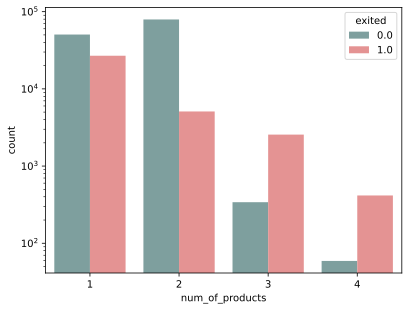

exited_count
num_of_products exited             
1               0.0          30.61%
                1.0          16.27%
2               0.0          47.99%
                1.0           3.09%
3               0.0           0.21%
                1.0           1.55%
4               0.0           0.04%
                1.0           0.25%

In [27]:
# Plot a count plot to visualize the distribution of 'exited' based on 'num_of_products'
sns.countplot(data=df[:len(train)], x='num_of_products', hue='exited', palette=['#78a5a3', '#f28585'])

# Set logarithmic scale on the y-axis for better visualization
plt.yscale('log')

# Display the plot
plt.show()

# Group the DataFrame by 'num_of_products' and 'exited', calculate the percentage of 'exited', and format the result as a string with percentage sign
result = df[:len(train)].groupby(['num_of_products', 'exited']).agg(
    exited_count=('exited', lambda x: round((x.count() / total_count) * 100, 2))
).astype(str) + '%'

# Display the result
result

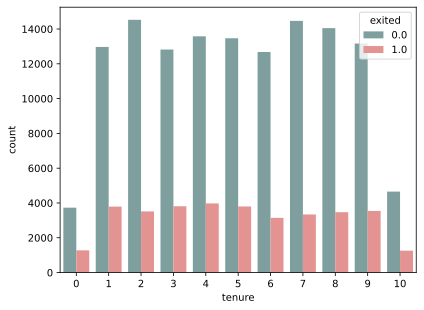

exited_count
tenure exited             
0      0.0           2.26%
       1.0           0.77%
1      0.0           7.86%
       1.0            2.3%
2      0.0            8.8%
       1.0           2.13%
3      0.0           7.77%
       1.0           2.31%
4      0.0           8.23%
       1.0           2.41%
5      0.0           8.16%
       1.0            2.3%
6      0.0           7.68%
       1.0           1.91%
7      0.0           8.77%
       1.0           2.02%
8      0.0           8.51%
       1.0            2.1%
9      0.0           7.98%
       1.0           2.15%
10     0.0           2.82%
       1.0           0.76%

In [28]:
# Plot a count plot to visualize the distribution of 'exited' based on 'tenure'
sns.countplot(data=df[:len(train)], x='tenure', hue='exited', palette=['#78a5a3', '#f28585'])

# Display the plot
plt.show()

# Group the DataFrame by 'tenure' and 'exited', calculate the percentage of 'exited', and format the result as a string with percentage sign
result = df[:len(train)].groupby(['tenure', 'exited']).agg(
    exited_count=('exited', lambda x: round((x.count() / total_count) * 100, 2))
).astype(str) + '%'

# Display the result
result

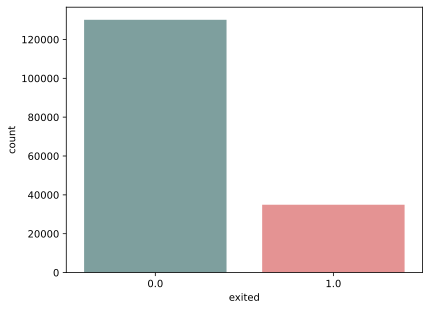

,exited_count
exited,
0.0,78.84%
1.0,21.16%


In [29]:
# Plot a count plot to visualize the distribution of 'exited'
sns.countplot(data=df[:len(train)], x='exited', palette=['#78a5a3', '#f28585'])

# Display the plot
plt.show()

# Group the DataFrame by 'exited' and calculate the percentage of 'exited', and format the result as a string with percentage sign
result = df[:len(train)].groupby(['exited']).agg(
    exited_count=('exited', lambda x: round((x.count() / total_count) * 100, 2))
).astype(str) + '%'

# Display the result
result

In [30]:
numerics = df[:len(train)].select_dtypes(include=np.number).drop(columns='exited')

In [31]:
numerics['credit_score'].mean()

656.454373038283

In [32]:
for i, col in enumerate(numerics, 1):
    for j, col2 in enumerate(numerics, 1):
        print(col)

credit_score
credit_score
credit_score
credit_score
credit_score
credit_score
credit_score
credit_score
age
age
age
age
age
age
age
age
tenure
tenure
tenure
tenure
tenure
tenure
tenure
tenure
balance
balance
balance
balance
balance
balance
balance
balance
num_of_products
num_of_products
num_of_products
num_of_products
num_of_products
num_of_products
num_of_products
num_of_products
has_cr_card
has_cr_card
has_cr_card
has_cr_card
has_cr_card
has_cr_card
has_cr_card
has_cr_card
is_active_member
is_active_member
is_active_member
is_active_member
is_active_member
is_active_member
is_active_member
is_active_member
estimated_salary
estimated_salary
estimated_salary
estimated_salary
estimated_salary
estimated_salary
estimated_salary
estimated_salary


In [33]:
# # Выберем только числовые столбцы
# numerics = df.select_dtypes(include=np.number)

# # Calculate the number of plots, rows, and columns for subplots
# num_plots = len(numerics.columns)
# num_columns = 3
# num_rows = num_plots // num_columns + (1 if num_plots % num_columns > 0 else 0)

# # Set the figure size based on the number of rows
# plt.figure(figsize=(11, 4 * num_rows))

# for i, col in enumerate(numerics, 1):
#     plt.subplot(num_rows, num_columns, i)  
#     z_scores = (numerics[col] - numerics[col].mean()) / numerics[col].std()

#     threshold = 3

#     plt.scatter(np.arange(len(z_scores)), z_scores, color='#FF6868', alpha=0.5)
#     plt.axhline(y=threshold, color='red', linestyle='--', label='Threshold')
#     plt.axhline(y=-threshold, color='red', linestyle='--')
#     plt.xlabel('Index')
#     plt.ylabel('Z-score')
#     plt.title(f'{" ".join(list(map(str.title, col.split("_"))))}')
#     plt.legend()

# plt.tight_layout()
# plt.show()

<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #cdbea7); border: 2px solid #000; border-radius: 40px; text-align: center; font-family: avenir;">
    
### Visualising Categorical and Numerical features distribution

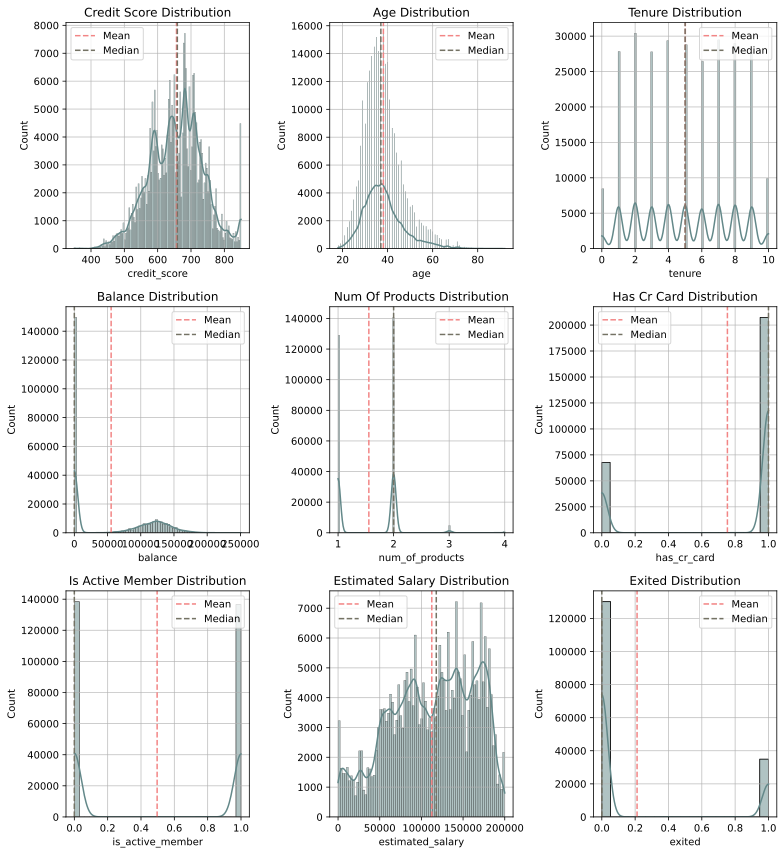

In [34]:
# Select numerical columns from the DataFrame
numerics = df.select_dtypes(include=np.number)

# Calculate the number of plots, rows, and columns for subplots
num_plots = len(numerics.columns)
num_columns = 3
num_rows = num_plots // num_columns + (1 if num_plots % num_columns > 0 else 0)



# Set the figure size based on the number of rows
plt.figure(figsize=(11, 4 * num_rows))

# Iterate over each numerical column and create a histogram subplot
for i, col in enumerate(numerics, 1):
    plt.subplot(num_rows, num_columns, i)  # Create subplot
    mean_values = numerics[col].mean()
    median = numerics[col].median()

    sns.histplot(numerics[col], kde=True, color='#638889')  # Plot histogram using seaborn
    plt.axvline(x=mean_values, color='#F28585', linestyle='--', label='Mean')
    plt.axvline(x=median, color='#747264', linestyle='--', label='Median')
    plt.grid(True, alpha=0.8)  # Add grid lines to the plot
    plt.title(f'{" ".join(list(map(str.title, col.split("_"))))} Distribution')  # Set title for the subplot
    plt.legend()

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()  # Display the plots

<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #cdbea7); border: 2px solid #000; border-radius: 40px; text-align: center; font-family: avenir;">
    
### Visualising features distributions and correlation

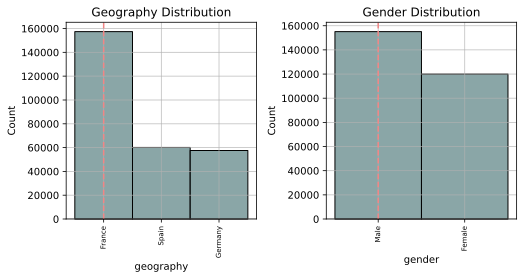

In [35]:
# Select categorical columns from the DataFrame
categorical_cols = df.select_dtypes(include=['object']).columns

# Calculate the number of plots, rows, and columns for subplots
num_plots = len(categorical_cols)
num_columns = 3
num_rows = num_plots // num_columns + (1 if num_plots % num_columns > 0 else 0)

# Set the figure size based on the number of rows
plt.figure(figsize=(11, 4 * num_rows))

# Iterate over each categorical column and create a histogram subplot
for i, col in enumerate(df[categorical_cols], 1):
    mode = df[col].mode()[0]    
    plt.subplot(num_rows, num_columns, i)  # Create subplot
    sns.histplot(df[col], color='#638889')  # Plot histogram using seaborn

    plt.axvline(x=mode, color='#F28585', linestyle='--', label='Mode')

    plt.xticks(rotation=90, fontsize=7)  # Rotate x-axis labels for better readability
    plt.title(f'{" ".join(list(map(str.title, col.split("_"))))} Distribution')  # Set title for the subplot
    plt.grid(True, alpha=0.8)  # Add grid lines to the plot

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()  # Display the plots

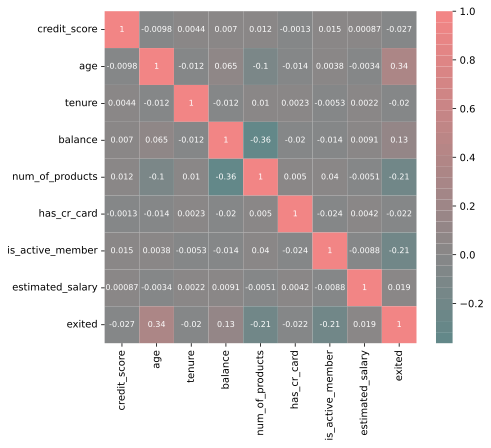

In [36]:
plt.figure(figsize=(7, 6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True,
            cmap=['#638889', '#678788', '#6c8788', '#718788', '#768788', '#7b8788', '#808788', '#858788', '#8a8787', '#8f8787',
                  '#948687', '#998687', '#9e8687', '#a38687', '#a88687', '#ac8686', '#b18686', '#b68686', '#bb8686', '#c08686',
                  '#c58586', '#ca8586', '#cf8585', '#d48585', '#d98585', '#de8585', '#e38585', '#e88585', '#ed8585', '#f28585'],
            annot_kws={"fontsize":8})
plt.show()

<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #ECE3CE); border: 2px solid #000; border-radius: 10px; font-family: avenir;">

## Data Analysis and Insights

Based on data analysis, here is a detailed summary:

### Geography
- **France**: 
  - 47.65% of the customers have not exited.
  - 9.44% of the customers have exited.
- **Germany**:
  - 13.02% of the customers have not exited.
  - 7.95% of the customers have exited.
- **Spain**:
  - 18.16% of the customers have not exited.
  - 3.78% of the customers have exited.

**Insight**: Customers from France have the highest retention rate, whereas Germany has the highest exit rate.

### Balance
- Customers with lower balances tend to have higher retention rates:
  - 50.01% did not exit, 10.0% exited.
- Higher balances have fewer exits:
  - 7.53% did not exit, 2.47% exited.

**Insight**: Lower balance customers have higher exit rates. As balance increases, the exit rate decreases.

### Age
- Younger customers (18-28) have a lower exit rate (0.87%).
- The exit rate increases with age, peaking in the 44-50 age range (5.18%).
- Customers older than 50 have an exit rate of 4.86%.

**Insight**: Middle-aged customers (44-50) are more likely to exit, while younger customers are more likely to stay.

### Credit Score
- Lower credit scores (350-554) have a higher exit rate (2.56%).
- Higher credit scores (754-850) have a lower exit rate (1.97%).

**Insight**: Customers with higher credit scores tend to stay with the bank, while those with lower credit scores are more likely to leave.

### Estimated Salary
- Salaries do not significantly impact the exit rate, which remains relatively consistent across different ranges.
- The highest exit rate (2.34%) is observed in the higher salary ranges.

**Insight**: Salary is not a major determinant of whether customers exit or stay.

### Gender
- **Female**: 12.18% exit rate.
- **Male**: 8.98% exit rate.

**Insight**: Female customers have a higher exit rate compared to male customers.

### Active Membership
- Non-active members have a significantly higher exit rate (14.92%).
- Active members have a lower exit rate (6.24%).

**Insight**: Active membership is a strong indicator of customer retention.

### Credit Card Ownership
- Customers without a credit card have a lower exit rate (5.6%) compared to those with a credit card (15.56%).

**Insight**: Credit card ownership correlates with a higher likelihood of exiting the bank.

### Number of Products
- Customers with only 1 product have the highest exit rate (16.27%).
- Customers with 2 products have a much lower exit rate (3.09%).

**Insight**: Customers with fewer products are more likely to leave, suggesting that offering more products could improve retention.

### Tenure
- Customers with 0 years of tenure have the highest exit rate (0.77%).
- The exit rate is generally consistent across different tenures, with a slight dip at 10 years (0.76%).

**Insight**: Tenure does not significantly affect the exit rate, though very new customers (0 years) have a higher exit rate.

### Overall Exit Rate
- 21.16% of customers have exited.
- 78.84% of customers have not exited.

**General Insight**: While a majority of customers stay, a significant portion (over 20%) exits the bank, indicating potential areas for improvement in customer retention strategies.

## Conclusion
The analysis reveals that certain demographic and behavioral factors significantly influence customer retention. Key insights include the higher exit rates among female customers, those with fewer products, and those who are not actively engaged with the bank. Lower balances and credit scores also correlate with higher exit rates. These findings suggest that personalized engagement strategies, financial advisory services, and incentives for active participation could be effective in reducing customer churn.

<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #a1d6e2); border: 2px solid #000; border-radius: 10px; text-align: center; font-family: avenir;">
    
# <a id='fifth'></a> Feature Engineering

In [37]:
# Drop specified columns and extract the remaining column names
cols = df.drop(columns=['estimated_salary', 'exited', 'balance']).columns.tolist()


In [38]:
# Calculate the total count of entries in the DataFrame subset
total_count = len(df[:len(train)])

for i, col in enumerate(cols):
    # Group the DataFrame by 'Geography' and 'Exited', calculate the count of 'Exited', and pivot the result
    result = df[:len(train)].groupby([col, 'exited']).size().unstack(fill_value=0).reset_index()
    
    # Calculate the percentage of 'Exited' for each 'Geography'
    result['exited_count_0'] = result[0.0] / total_count
    result['exited_count_1'] = result[1.0] / total_count
    
    # Calculate the difference between the percentages
    result['diff'] = result['exited_count_0'] - result['exited_count_1']
    
    # Merge the 'diff' column with the original DataFrame 'df' based on the 'Geography' column
    df = pd.merge(df, result[[col, 'diff']], on=col, how='left')
    
    # Rename the 'diff' column to 'Geography_feature_diff'
    df.rename(columns={'diff': f'{col}_feature_diff'}, inplace=True)

In [39]:
df.isna().sum()

credit_score                          0
geography                             0
gender                                0
age                                   0
tenure                                0
balance                               0
num_of_products                       0
has_cr_card                           0
is_active_member                      0
estimated_salary                      0
exited                           110023
credit_score_feature_diff             1
geography_feature_diff                0
gender_feature_diff                   0
age_feature_diff                      4
tenure_feature_diff                   0
num_of_products_feature_diff          0
has_cr_card_feature_diff              0
is_active_member_feature_diff         0
dtype: int64

In [40]:
# Fill missing values in 'credit_score_feature_diff' column with the mean of non-missing values
df['credit_score_feature_diff'].fillna(df['credit_score_feature_diff'].mean(), inplace=True)

# Fill missing values in 'age_feature_diff' column with the mean of non-missing values
df['age_feature_diff'].fillna(df['age_feature_diff'].mean(), inplace=True)


<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #cdbea7); border: 2px solid #000; border-radius: 40px; text-align: center; font-family: avenir;">
    
### Binning

                   Bin   Count  Count (%)  Non-event  Event  Event rate  \
0        (-inf, 26.50)    9775   0.059230       8897    878    0.089821   
1       [26.50, 33.50)   42267   0.256111      38742   3525    0.083398   
2       [33.50, 34.50)    8625   0.052262       8030    595    0.068986   
3       [34.50, 36.72)   17675   0.107099      15574   2101    0.118868   
4       [36.72, 37.50)    9255   0.056079       8153   1102    0.119071   
5       [37.50, 38.50)    9246   0.056025       8047   1199    0.129678   
6       [38.50, 40.50)   15940   0.096586      12852   3088    0.193726   
7       [40.50, 42.50)   11533   0.069883       8844   2689    0.233157   
8       [42.50, 45.50)   12630   0.076530       7859   4771    0.377751   
9       [45.50, 48.50)    9012   0.054607       4361   4651    0.516090   
10        [48.50, inf)   19076   0.115588       8754  10322    0.541099   
11             Special       0   0.000000          0      0    0.000000   
12             Missing   

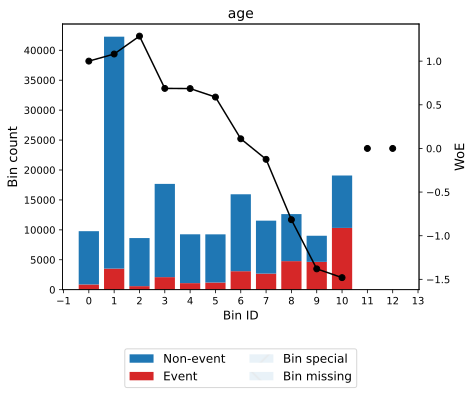

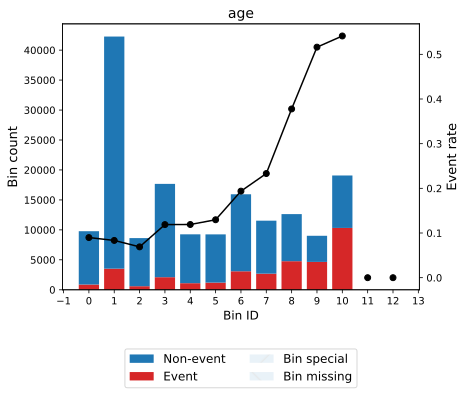

In [41]:
# Define a function to perform optimal binning transformation
def opt_bin_transform(df, x, y, dtype, solver, cat_cutoff=None):
    # Create an instance of OptimalBinning with specified parameters
    optb = OptimalBinning(name=x, dtype=dtype, solver=solver)
    
    # Fit the optimal binning model to the data
    optb.fit(df[:len(train)][x].values, y)
    
    # Get the binning table
    binning_table = optb.binning_table
    
    # Transform the variable using the optimal binning solution and return the transformed variable and binning table
    return optb.transform(df[x], metric="woe"), binning_table

# Apply optimal binning transformation to the 'age' column in the DataFrame
df['age_bins'], binning_table = opt_bin_transform(df.drop(columns='exited'), 'age', TARGET, "numerical", 'cp')

# Determine the type of binning table
type(binning_table)

# Build the optimal binning solution based on the binning table
optimal_binning = binning_table.build()

# Print the optimal binning solution
print(optimal_binning)

# Visualize the binning table using metrics such as WOE and event rate
metrics = ['woe', 'event_rate']
for i, metric in enumerate(metrics, 1):
    binning_table.plot(metric=metric)


              Bin   Count  Count (%)  Non-event  Event  Event rate       WoE  \
0        [France]   94215   0.570882      78643  15572    0.165282  0.304129   
1         [Spain]   36213   0.219428      29978   6235    0.172176   0.25497   
2       [Germany]   34606   0.209690      21492  13114    0.378952 -0.821315   
3         Special       0   0.000000          0      0    0.000000       0.0   
4         Missing       0   0.000000          0      0    0.000000       0.0   
Totals             165034   1.000000     130113  34921    0.211599             

              IV        JS  
0       0.048204  0.006002  
1       0.013221  0.001648  
2       0.172767  0.021009  
3       0.000000  0.000000  
4       0.000000  0.000000  
Totals  0.234192  0.028659  


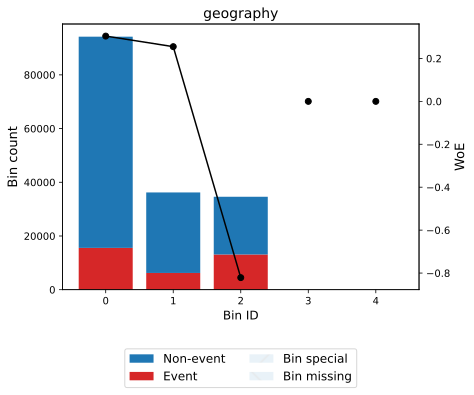

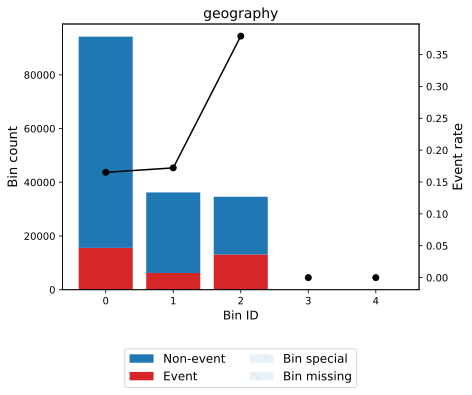

In [42]:
# Apply optimal binning transformation to the 'geography' column in the DataFrame
df['country_bin'], binning_table = opt_bin_transform(df.drop(columns='exited'), 'geography', TARGET, 'categorical', 'cp', cat_cutoff=0.1)

# Determine the type of binning table
type(binning_table)

# Build the optimal binning solution based on the binning table
optimal_binning = binning_table.build()

# Print the optimal binning solution
print(optimal_binning)

# Visualize the binning table using metrics such as WOE and event rate
metrics = ['woe', 'event_rate']
for i, metric in enumerate(metrics, 1):
    binning_table.plot(metric=metric)


                     Bin   Count  Count (%)  Non-event  Event  Event rate  \
0         (-inf, 560.50)   19647   0.119048      14842   4805    0.244567   
1       [560.50, 659.50)   63035   0.381952      49122  13913    0.220719   
2       [659.50, 709.50)   40174   0.243429      32491   7683    0.191243   
3       [709.50, 730.50)   14649   0.088764      11969   2680    0.182948   
4          [730.50, inf)   27529   0.166808      21689   5840    0.212140   
5                Special       0   0.000000          0      0    0.000000   
6                Missing       0   0.000000          0      0    0.000000   
Totals                    165034   1.000000     130113  34921    0.211599   

             WoE        IV            JS  
0      -0.187511  0.004411  5.506214e-04  
1      -0.053832  0.001124  1.404848e-04  
2       0.126638  0.003762  4.698748e-04  
3       0.181188  0.002762  3.447967e-04  
4      -0.003241  0.000002  2.191594e-07  
5            0.0  0.000000  0.000000e+00  
6    

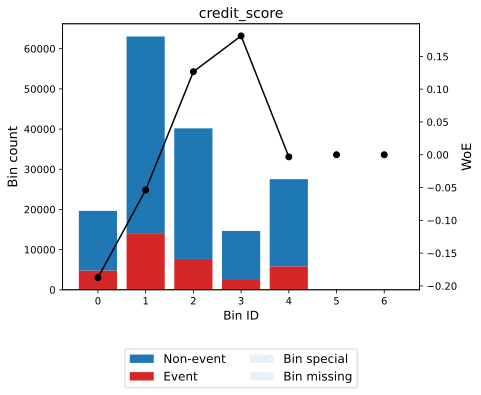

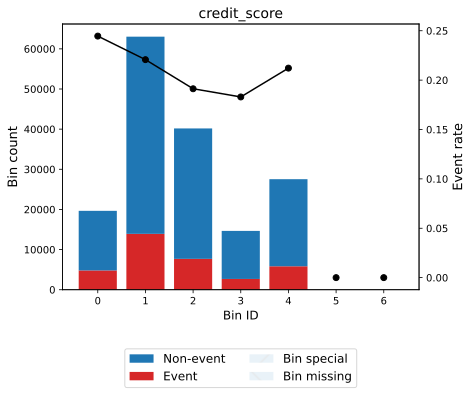

In [43]:
# Apply optimal binning transformation to the 'credit_score' column in the DataFrame
df['score_bins'], binning_table = opt_bin_transform(df.drop(columns='exited'), 'credit_score', TARGET, 'numerical', 'cp')

# Determine the type of binning table
type(binning_table)

# Build the optimal binning solution based on the binning table
optimal_binning = binning_table.build()

# Print the optimal binning solution
print(optimal_binning)

# Visualize the binning table using metrics such as WOE and event rate
metrics = ['woe', 'event_rate']
for i, metric in enumerate(metrics, 1):
    binning_table.plot(metric=metric)


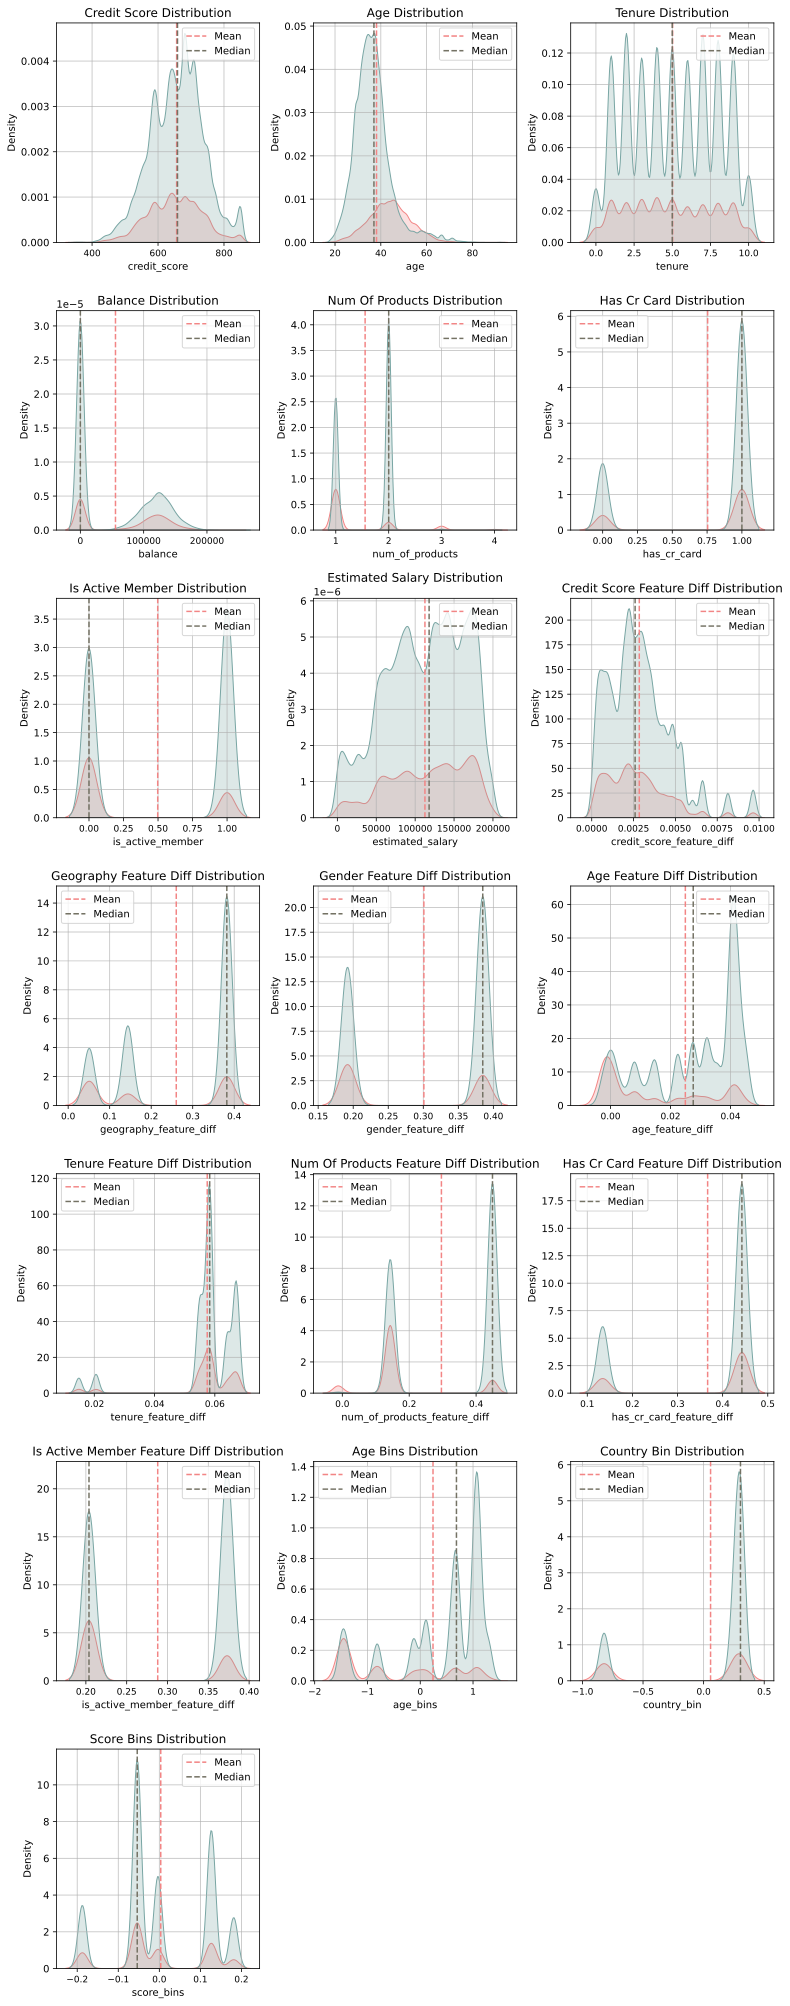

In [44]:
# Select numerical columns from the DataFrame, excluding the 'exited' column
numerics = df.select_dtypes(include=np.number)[:len(train)].drop(columns='exited')

# Get the number of numerical columns
num_plots = numerics.shape[1]

# Define the number of columns in the subplot grid
num_columns = 3

# Calculate the number of rows needed in the subplot grid
row_nums = (numerics.shape[1] // 3) + (1 if num_plots % num_columns > 0 else 0)

# Set the figure size based on the number of rows needed
plt.figure(figsize=(11, 4 * row_nums))

# Iterate through each numerical column and plot it in a subplot
for i, col in enumerate(numerics, 1):
    # Create a subplot in the grid
    plt.subplot(row_nums, num_columns, i)

    # Calculate the mean value of the column
    mean_values = numerics[col].mean()
    
    # Calculate the median value of the column
    median = numerics[col].median()

    
    sns.kdeplot(data = numerics, x = col, hue=TARGET, fill=True, palette=['#78a5a3', '#f28585']) # Plot histogram using seaborn
 
    plt.axvline(x=mean_values, color='#F28585', linestyle='--', label='Mean')
    plt.axvline(x=median, color='#747264', linestyle='--', label='Median')
    plt.grid(True, alpha=0.8)  # Add grid lines to the plot
    plt.xticks(rotation=0, fontsize=9)  # Rotate x-axis labels for better readability
    plt.title(f'{" ".join(list(map(str.title, col.split("_"))))} Distribution')  # Set title for the subplot
    plt.legend()

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.savefig('kdedist.png')
plt.show()  # Display the plots
    

<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #cdbea7); border: 2px solid #000; border-radius: 40px; text-align: center; font-family: avenir;">
    
### Feature Transformation

In [45]:
# Create a new binary column indicating if the balance is zero or not
df['is_zero_balance'] = df['balance'].apply(lambda x: 0 if x == 0 else 1)

# Define a function to calculate the ratio of tenure to age
def tenure_age(row):
    return row['tenure'] / row['age']

# Apply the tenure_age function to each row to create a new column 'tenure_age'
df['tenure_age'] = df.apply(tenure_age, axis=1)

# Create a new column 'age_salary' by dividing estimated salary by age
df['age_salary'] = df.apply(lambda row: row['estimated_salary'] / row['age'], axis=1)

# Create a new column 'balance_products_age_salary' by calculating a combination of balance, number of products, age, and salary
df['balance_products_age_salary'] = df.apply(lambda row: row['balance'] / row['num_of_products'] + row['age_salary'], axis=1)

# Apply log transformation to 'balance_products_age_salary' column
df['balance_products_age_salary'] = np.log1p(df['balance_products_age_salary'].values)

# Create a new column 'salary_credit_score' by dividing estimated salary by credit score
df['salary_credit_score'] = df['estimated_salary'] / df['credit_score']

# Create a new column 'salary_score_bins' by multiplying 'score_bins' with 'salary_credit_score'
df['salary_score_bins'] = df['score_bins'] * df['salary_credit_score']

# Scale 'age' column by multiplying by 5
df['age'] = (df['age'] * 10) / 2

# Define a list of columns for which to calculate frequency
cols = ['age', 'tenure', 'balance', 'num_of_products', 'score_bins', 'tenure_age', 'age_salary',
        'balance_products_age_salary', 'salary_credit_score', 'salary_score_bins']

# Define a function to calculate frequency of each value in a column
def cols_func(row, feature):
    temp = row[feature].value_counts()
    return row[feature].apply(lambda x: temp[x])

# Apply the cols_func function to each column in the list 'cols' to create new columns with frequency counts
for feature in cols:
    df[f'{feature}_frequency'] = cols_func(df, feature)


<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #cdbea7); border: 2px solid #000; border-radius: 40px; text-align: center; font-family: avenir;">
    
### Encoding categorical variables using one-hot encoding

In [46]:
# Extract features and encode categorical variables using one-hot encoding
X = pd.get_dummies(df[:len(train)].drop(columns='exited'))
TEST = pd.get_dummies(df[len(train):])

# Extract the target variable
y = df[:len(train)]['exited']


<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #a1d6e2); border: 2px solid #000; border-radius: 10px; text-align: center; font-family: avenir;">
    
# <a id='seventh'></a> Model Training and Validating with StratifiedKFold

<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #ECE3CE); border: 2px solid #000; border-radius: 10px; font-family: avenir;">

### Feature Selection and Transformation

The custom class `NumberSelector` is designed to facilitate feature selection within a pipeline. It inherits from `BaseEstimator` and `TransformerMixin`, allowing it to be seamlessly integrated into scikit-learn's pipeline framework. The `NumberSelector` class:

- **Initialization (`__init__`):** Takes a `key` parameter, which specifies the column to be selected.
- **Fit Method (`fit`):** Implements a no-operation fit method that returns `self`, making it compatible with the pipeline structure.
- **Transform Method (`transform`):** Selects and returns the specified column from the input DataFrame.

This class is essential for ensuring that specific columns are appropriately processed in the pipeline.

### Model Parameter Distribution

The `param_distributions` dictionary defines the hyperparameters for the `LGBMClassifier` that will be optimized. It includes:

- `classifier__max_depth`: Controls the maximum depth of the trees.
- `classifier__min_samples_split`: Specifies the minimum number of samples required to split an internal node.

These hyperparameters are crucial for controlling the complexity and generalization ability of the model.

### Cross-Validation Strategy

The code employs `StratifiedKFold` for cross-validation, ensuring that each fold maintains the same proportion of class labels. This is particularly important for imbalanced datasets. The cross-validation process involves:

- Splitting the data into training and test sets.
- Iteratively training and evaluating the model on each fold.

### Feature Engineering Pipeline

For each column in the training data, a pipeline is created that includes:

- **Number Selection (`NumberSelector`):** Selects the column.
- **Scaling (`RobustScaler`):** Scales the data to be robust against outliers.

These individual pipelines are combined using `FeatureUnion`, which ensures that each feature is processed independently before being merged back into a single dataset.

### Model Pipeline and Hyperparameter Tuning

The final model pipeline includes:

- **Feature Processing (`FeatureUnion`):** Combines the feature transformation pipelines.
- **Classifier (`LGBMClassifier`):** A gradient boosting model specifically optimized for speed and performance.

Hyperparameter tuning is performed using `HalvingRandomSearchCV`, an efficient search algorithm that progressively discards less promising configurations. It uses:

- **Estimation with Cross-Validation (`cv=5`):** Performs internal cross-validation to evaluate model performance.
- **Resource Allocation (`resource='n_samples'`):** Allocates resources based on the number of samples.
- **Optimization Factor (`factor=3`):** Determines the proportion of configurations to keep after each iteration.

### Model Evaluation

After fitting the model, the AUC (Area Under the Curve) score is computed for each fold, and the results are aggregated to provide an overall assessment of model performance. This process includes:

- **Prediction (`predict_proba`):** Generates probability estimates for the test set.
- **AUC Calculation (`roc_auc_score`):** Computes the AUC score for the predictions.

Finally, the AUC scores are printed, providing insight into the model's performance across different folds.

### Summary

This code exemplifies a sophisticated approach to model building in machine learning, combining custom transformers, robust feature scaling, advanced hyperparameter optimization, and rigorous cross-validation. The use of `Pipeline`, `FeatureUnion`, and `HalvingRandomSearchCV` ensures that the model is both efficient and well-tuned, capable of delivering high predictive performance.

In [47]:
# Define a custom transformer class called NumberSelector
class NumberSelector(BaseEstimator, TransformerMixin):
    # Initialize the transformer with a key
    def __init__(self, key):
        # Store the provided key as an instance variable
        self.key = key

    # The fit method is required but doesn't need to do anything for this transformer
    def fit(self, X, y=None):
        # Return self to allow for method chaining
        return self

    # The transform method selects and returns the column specified by the key
    def transform(self, X):
        # Use the key to select the column from the DataFrame X and return it
        return X[[self.key]]


# Define a parameter distribution for HalvingRandomSearchCV
param_distributions = {
    'classifier__max_depth': [5, 10, 20],
    'classifier__min_samples_split': [2, 5, 10]
}

# Initialize a Stratified K-Fold Cross-Validation with 5 folds
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# List to store AUC values for each fold
auc_vals = []

# Perform Stratified K-Fold Cross-Validation
for train_index, test_index in skf.split(X, y):
    # Split data into training and testing sets based on the indices
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # List to store transformers for each column
    final_transformers = []
    
    # Create a pipeline for each column in the training set
    for col in X_train.columns:
        pipeline = Pipeline([
            ('selector', NumberSelector(key=col)),  # Select the column
            ('scaler', RobustScaler())  # Scale the selected column
        ])
        final_transformers.append((col, pipeline))
    
    # Combine all column transformers into a FeatureUnion
    feats = FeatureUnion(final_transformers)
    
    # Create a pipeline for feature processing
    feature_processing = Pipeline([('feats', feats)])
    
    # Create the final pipeline including the feature processing and the classifier
    pipeline = Pipeline([
        ('features', feature_processing),
        ('classifier', LGBMClassifier(metric='auc', random_state=42, verbosity=-1))
    ])

    
    # Create an instance of HalvingRandomSearchCV
    hyperband_search = HalvingRandomSearchCV(
        estimator=pipeline,
        param_distributions=param_distributions,
        cv=5,  # 5-fold cross-validation
        factor=3,  # Halving factor
        resource='n_samples',
        max_resources='auto',
        random_state=42
    )
    
    # Fit the HalvingRandomSearchCV on the entire dataset
    hyperband_search.fit(X, y)

    # Predict the probabilities for the test set
    y_pred_val_proba = hyperband_search.predict_proba(X_test)[:, 1]
    
    # Calculate the AUC for the validation set
    auc_val = roc_auc_score(y_test, y_pred_val_proba)
    
    # Append the AUC value to the list
    auc_vals.append(auc_val)

# Print the AUC values for each fold and the mean AUC
print(f"AUCs: {auc_vals}")
print(f"Mean AUC: {np.mean(auc_vals)}")
print("----------------")


AUCs: [0.9031387705580212, 0.9025709738706341, 0.9042718109000324, 0.9044467989670322, 0.9011364227625528]
Mean AUC: 0.9031129554116546
----------------


<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #a1d6e2); border: 2px solid #000; border-radius: 10px; text-align: center; font-family: avenir;">
    
# <a id='eighth'></a> Model Evaluation

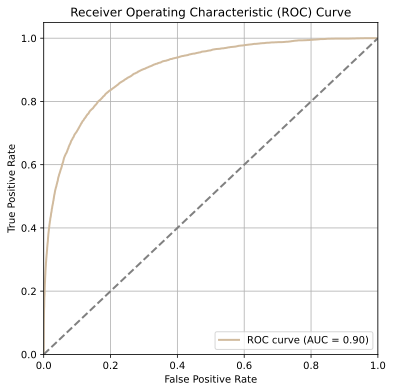

In [51]:
# Predict the probabilities for the test set
y_probs = hyperband_search.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='#D1BB9E', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # Diagonal line
plt.xlim([0.0, 1.0])  # Set x-axis limits
plt.ylim([0.0, 1.05])  # Set y-axis limits
plt.xlabel('False Positive Rate')  # Label for x-axis
plt.ylabel('True Positive Rate')  # Label for y-axis
plt.title('Receiver Operating Characteristic (ROC) Curve')  # Title of the plot
plt.legend(loc='lower right')  # Legend location
plt.grid()
plt.show()  # Display the plot

In [52]:
# Compute precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Calculate F1 score for each threshold
f_score = (2 * precision * recall) / (precision + recall)

# Find index of the maximum F1 score
ix = np.argmax(f_score)

# Convert predicted probabilities to binary predictions based on the threshold that maximizes F1 score
binary_preds = np.where(y_probs > thresholds[ix], 1, 0)

# Generate classification report
report = classification_report(y_test, binary_preds)

# Print the classification report
print(report)


              precision    recall  f1-score   support

         0.0       0.92      0.91      0.91     26022
         1.0       0.67      0.69      0.68      6984

    accuracy                           0.86     33006
   macro avg       0.79      0.80      0.80     33006
weighted avg       0.86      0.86      0.86     33006



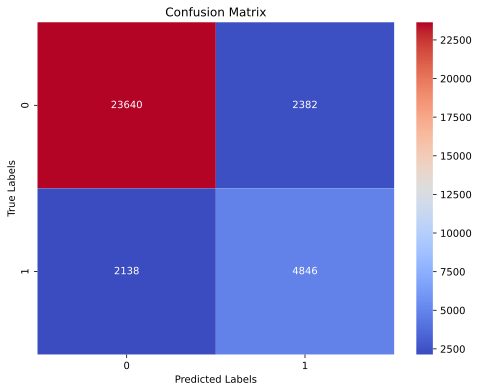

In [54]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, binary_preds)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))  # Set the size of the figure
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm')  # Plot the heatmap with annotations, using 'coolwarm' colormap
plt.xlabel('Predicted Labels')  # Label for x-axis
plt.ylabel('True Labels')  # Label for y-axis
plt.title('Confusion Matrix')  # Title of the plot
plt.show()  # Display the plot

<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #cdbea7); border: 2px solid #000; border-radius: 40px; text-align: center; font-family: avenir;">
    
### Feature Importances

In [72]:

# Get the best estimator from HalvingRandomSearchCV
best_estimator = hyperband_search.best_estimator_

# Access the classifier from the pipeline
classifier = best_estimator.named_steps['classifier']

# Check if the classifier has feature_importances_ attribute
if hasattr(classifier, 'feature_importances_'):
    # Get feature importances
    importances = classifier.feature_importances_
    
    # Now you can proceed to create a DataFrame with feature importances
    features_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
    
    # Sort the DataFrame by feature importance in descending order
    features_df = features_df.sort_values(by='Importance', ascending=False)

    # Normalize importances to sum up to 1
    features_df['Importance'] = (features_df['Importance'] / features_df['Importance'].sum()).apply('{:.2%}'.format)

    print(features_df[features_df['Importance'] != '0.00%'].reset_index(drop=True))


                                  Feature Importance
0                                     age      8.77%
1             balance_products_age_salary      7.07%
2               credit_score_feature_diff      6.03%
3                                 balance      5.53%
4                        is_active_member      4.97%
5   balance_products_age_salary_frequency      4.87%
6                        age_feature_diff      4.67%
7                  geography_feature_diff      4.17%
8                    age_salary_frequency      4.10%
9           salary_credit_score_frequency      4.07%
10                      balance_frequency      4.07%
11                           credit_score      4.00%
12                    gender_feature_diff      3.83%
13                      salary_score_bins      3.73%
14                             age_salary      3.70%
15                       estimated_salary      3.63%
16                             tenure_age      3.17%
17                    salary_credit_score     

<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #a1d6e2); border: 2px solid #000; border-radius: 10px; text-align: center; font-family: avenir;">
    
# <a id='ten'></a> Test Data Submission

In [73]:
# Use the best_model to predict the target variable for the testing dataset
target_pred = hyperband_search.predict_proba(TEST)[:, 1]

# Read the sample submission file and set the 'Id' column as the index
submission = pd.read_csv('./data/sample_submission.csv', index_col='id')

# Update the 'SalePrice' column in the submission DataFrame with the predicted target variable values
submission['Exited'] = target_pred

# Display the updated submission DataFrame
submission

,Exited
id,
165034,0.016562
165035,0.856080
165036,0.017220
165037,0.220937
165038,0.382104
...,...
275052,0.055033
275053,0.089066
275054,0.012181


In [74]:
# Save the submission DataFrame to a CSV file named 'submission.csv' in the './data' directory
submission.to_csv('./data/submission.csv')

In [75]:
!pip freeze > requirements.txt

In [76]:
!python3 --version

Python 3.11.7


In [77]:
!which python

/Users/sergey/.pyenv/versions/3.11.7/bin/python
